In [1]:
"""
Pyjnu-Py_Example.ipynb
Authors:
    -Stephan Meighen-Berger
An example of how to use the python module
"""

'\nPyjnu-Py_Example.ipynb\nAuthors:\n    -Stephan Meighen-Berger\nAn example of how to use the python module\n'

In [2]:
"""
imports external
"""
%matplotlib inline
import sys
sys.path.append("C:/Users/steph/Documents/PhD/pyjnu/py_core/")
# sys.path.append("/Users/theoglauch/Documents/PhD/Pyjnu-ECP/py_core/")
import logging
import matplotlib.pyplot as plt
import csv as csv
import numpy as np

In [3]:
from pyjnu import PyRun
from constants import phys_const

In [4]:
logging.basicConfig(level=logging.INFO)

In [5]:
PYJNU = PyRun(
    Bfield=0.088,
    delta=230.,
    R=0.19e15,
    d=540.,
    z=0.116,
)

INFO:__builtin__.instance:Initializing the class...
INFO:__builtin__.instance:Setting user defined variables..
INFO:__builtin__.instance:Finished setting the variables.
INFO:__builtin__.instance:Creating the particle instances...
INFO:__builtin__.instance:Creating particle 11
INFO:__builtin__.instance:Finished particle 11
INFO:__builtin__.instance:Creating particle 22
INFO:__builtin__.instance:Finished particle 22
INFO:__builtin__.instance:Creating particle 22_local
INFO:__builtin__.instance:Finished particle 22_local
INFO:__builtin__.instance:Finished particle creation
INFO:__builtin__.instance:Loading the rates...
INFO:__builtin__.instance:Finished loading
INFO:__builtin__.instance:Finished initialization


In [6]:
PYJNU.solve_steady()

INFO:__builtin__.instance:Starting steady state solving...
INFO:__builtin__.instance:Setting the geometry...
INFO:__builtin__.instance:Creating the geometry object...
INFO:__builtin__.instance:Finished creating the geometry object...
INFO:__builtin__.instance:Geometry set
INFO:__builtin__.instance:The initial electron spectrum...
INFO:__builtin__.instance:Set the initial spectrum
INFO:__builtin__.instance:Synchrotron...
INFO:__builtin__.instance:Inverse Compton...
INFO:__builtin__.instance:Case B
INFO:__builtin__.instance:Storing results...
INFO:__builtin__.instance:Finished steady state solving...
INFO:__builtin__.instance:Results stored in particle fluxes...


In [7]:
e_grid = PYJNU.particles['22'].e_grid
flux_0 = PYJNU.particles['22'].flux['0']
flux_2 = PYJNU.particles['22'].flux['2']

In [8]:
print np.sum(flux_0)
print np.sum(flux_2)

1.2711683528480495e-23
1.1012887651689784e-49


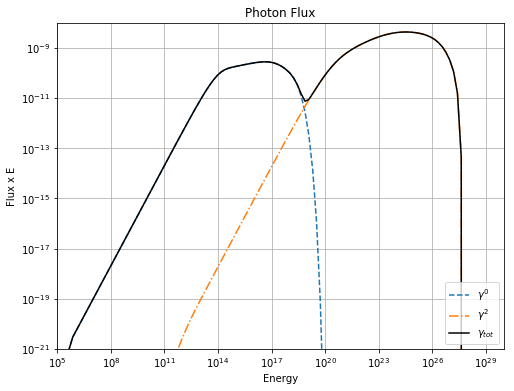

In [9]:
figure  = plt.figure(figsize=(8, 6))
flux1 = flux_0 * e_grid
flux2 = flux_2 * e_grid * phys_const['mec2'] / phys_const['h']
total = flux1 + flux2
plt.plot(e_grid,
         flux1,
         ls='--', label=r'$\gamma^0$')
plt.plot(e_grid,
         flux2,
         ls='-.', label=r'$\gamma^2$')
plt.plot(e_grid,
         total,
         ls='-', label=r'$\gamma_{tot}$',
         color='k')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Photon Flux')
plt.xlabel('Energy')
plt.ylabel('Flux x E')
plt.xlim(1e5, 1e30)
plt.ylim(1e-21, 1e-8)
plt.loglog()
plt.show()

In [10]:
print np.sum(flux_0)
print np.sum(flux_2)

1.2711683528480495e-23
1.1012887651689784e-49
